<a href="https://colab.research.google.com/github/Aryan-Gupta2002/Deep-Learning---Tensorflow/blob/main/neuralNetworkForRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Notebook for doing regression prediction tasks using Neural Network with Tensorflow

## Step 1: Encode the inputs into some numerical fomat. Example:  
House price prediction,   
Inputs = 4 bedrooms, 2 car space, 2 bathrooms  
One Hot Encoded =   
[[0,0,0,1],  
[0,1,0,0],  
[0,1,0,0]]  


### Architecture of Neural Network

(np.float64(-0.5), np.float64(1075.5), np.float64(461.5), np.float64(-0.5))

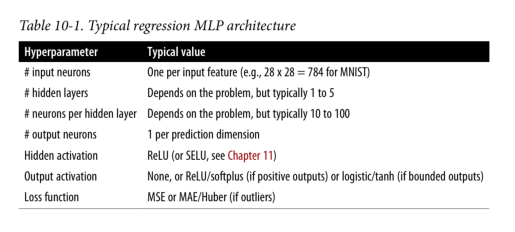

In [73]:
from PIL import Image
import matplotlib.pyplot as plt


img = Image.open('/content/drive/MyDrive/Colab Notebooks/Screenshot 2026-01-24 194032.png')
plt.imshow(img)
plt.axis('off')

Optimizer - SGD or ADAM

In [74]:
import tensorflow as tf
print(tf.__version__)

2.19.0


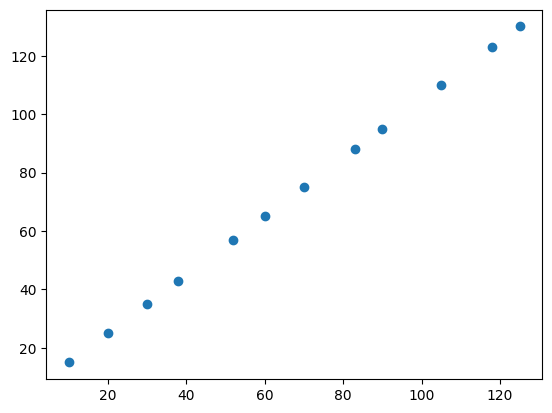

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# Creating Features
x = np.array([10,20,30,38,52,60,70,83,90,105,118,125])

# creating Labels
y=x+5

# Visualizing
plt.scatter(x,y)

### Input and Output Shapes

In [76]:
x = tf.constant(x)
y = tf.constant(y)
x,y

(<tf.Tensor: shape=(12,), dtype=int64, numpy=array([ 10,  20,  30,  38,  52,  60,  70,  83,  90, 105, 118, 125])>,
 <tf.Tensor: shape=(12,), dtype=int64, numpy=array([ 15,  25,  35,  43,  57,  65,  75,  88,  95, 110, 123, 130])>)

In [77]:
inShape = x[0].shape
ouShape = y[0].shape
inShape,ouShape

(TensorShape([]), TensorShape([]))

### Steps in modeling with tensorflow
•**Creating a model** - define the input and output layers, as well as hidden layers of a deep learning mode.  

•**Compiling a model** - define the loss function and optimizer and evaluation metrices.
Loss-> Optimizer-> Metrics  

•**Fitting a model** - letting the model try to find patterns between x and y, featues and labels.  


**Get data ready -> Build or pick pretrained model -> Fit the model to the data and make prediction -> Evaluate model -> Improve through experimentation -> Save and reload your trained model**

In [78]:
#Set random Seed
tf.random.set_seed(42)
# 1. Create a model using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
#2. Compile the model
model.compile(loss =tf.keras.losses.MAE,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
#3. Fit the model
model.fit(tf.expand_dims(x,axis=-1),y,epochs=10)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step - loss: 178.3316 - mae: 178.3316
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 133.7660 - mae: 133.7660
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 89.2004 - mae: 89.2004
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 44.6347 - mae: 44.6347
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 2.3264 - mae: 2.3264
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 21.2623 - mae: 21.2623
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 23.4229 - mae: 23.4229
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 20.1481 - mae: 20.1481
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 24.5090 - mae: 24.5090
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 19.0339 - mae: 19.0339


"Sequential" groups a linear stack of layers into a Model  

In [79]:
# Different way of using
# model = tf.keras.Sequential()
# model.add(tf.keras.Input(shape=(16,)))
# model.add(tf.keras.layers.Dense(8))
# model.add(tf.keras.layers.Dense(1))

In [80]:
x,y

(<tf.Tensor: shape=(12,), dtype=int64, numpy=array([ 10,  20,  30,  38,  52,  60,  70,  83,  90, 105, 118, 125])>,
 <tf.Tensor: shape=(12,), dtype=int64, numpy=array([ 15,  25,  35,  43,  57,  65,  75,  88,  95, 110, 123, 130])>)

In [81]:
# Trying and make a prediction using our model
y_pred=model.predict(tf.constant([15]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


array([[21.902401]], dtype=float32)

In [82]:
y_actual = 20 # EXPECTED OUTPUT
y_actual

20

###Improving our model
We can improve our model, by altering the steps we took to create a model.  
1.**Creating a model**- here we might add more layers, neurons within each layer, change activation functon of each layer.  
2.**Compiling**-here we might change the optimization function or perhaps **learning** rate of the optimization function.  
3.**Fitting the model**-here we might fit a model for more **epochs** or on more data.


In [92]:
#Let's rebuild our model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
model.fit(tf.expand_dims(x,axis=-1),y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step - loss: 9.2569 - mae: 9.2569
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 32.6151 - mae: 32.6151
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 12.3602 - mae: 12.3602
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 31.5009 - mae: 31.5009
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 13.4463 - mae: 13.4463
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 30.3867 - mae: 30.3867
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 14.5324 - mae: 14.5324
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 29.2726 - mae: 29.2726
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 15.6185 - mae: 15.6185
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 28.1584 - mae: 28.1584
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 16.7046 - mae: 16.7046
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 27.0443 - mae: 27.0443
Epoch 13/100
1/1 ━━━━━━━━

In [84]:
x,y

(<tf.Tensor: shape=(12,), dtype=int64, numpy=array([ 10,  20,  30,  38,  52,  60,  70,  83,  90, 105, 118, 125])>,
 <tf.Tensor: shape=(12,), dtype=int64, numpy=array([ 15,  25,  35,  43,  57,  65,  75,  88,  95, 110, 123, 130])>)

In [93]:
#Let's see if the model has improves
model.predict(tf.constant([15]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


array([[22.586668]], dtype=float32)

In [94]:
# Rebuilding Our Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4,input_shape=(1,)),
    tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
model.fit(tf.expand_dims(x,axis=-1),y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step - loss: 21.9340 - mae: 21.9340
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 131.6204 - mae: 131.6204
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 56.4417 - mae: 56.4417
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 9.2480 - mae: 9.2480
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 104.2498 - mae: 104.2498
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 52.5364 - mae: 52.5364
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 17.6519 - mae: 17.6519
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 78.7354 - mae: 78.7354
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 55.1120 - mae: 55.1120
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 25.4855 - mae: 25.4855
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 56.8617 - mae: 56.8617
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 57.5123 - mae: 57.5123
Epoch 13/100
1/1 ━━━━━

In [95]:
model.predict(tf.constant([15]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


array([[21.279028]], dtype=float32)